<a href="https://colab.research.google.com/github/NithishaRaghavaraju/Employee_review_analysis/blob/main/Employee_factor_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install soyspacing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install git+https://github.com/MaxHalford/Prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/MaxHalford/Prince to /tmp/pip-req-build-m2wui8ks
  Running command git clone -q https://github.com/MaxHalford/Prince /tmp/pip-req-build-m2wui8ks
  Created wheel for prince: filename=prince-0.7.0-py3-none-any.whl size=26169 sha256=4aac500bf67438f05dce1eeb211f239b7988c58c5b31f4e97523b86a975541d7
  Stored in directory: /tmp/pip-ephem-wheel-cache-p02srgp4/wheels/0e/01/2a/f8fa8144ca0174bcee4434fc34b08f1a77e2122fd2d8de493c
Successfully built prince


In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=e0755e7deb2deeff3d7910d6824295f0b5741efe0b123462860dd7e414c1cef2
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
!pip install dominance-analysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.9 MB 1.7 MB/s 
  Created wheel for dominance-analysis: filename=dominance_analysis-1.1.7-py3-none-any.whl size=12844 sha256=407f8615ad6a51ef41b8832a50ed17464e3aa6e851a5a70d91c740bc70469f3d
  Stored in directory: /root/.cache/pip/wheels/48/36/a8/88497a3cd9d682272fef258f4d1f2785ec93d423b0ec535063
Successfully built dominance-analysis
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.5.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from soyspacing.countbase import CountSpace
import json
import glob
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import CoherenceModel
from gensim.models import TfidfModel
import pyLDAvis
import pyLDAvis.gensim_models

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
import nltk
import string
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")
stopwords.extend(string.punctuation)
from textblob import TextBlob
nltk.download('brown')
nltk.download('punkt')

/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio5.py:95: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from .mio5_utils import VarReader5
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
unstructured_df = pd.read_csv("/content/train.csv")

In [ ]:
unstructured_df.head()

,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall
0,1,startup_1,NaN,"Dec 11, 2018",Current Employee,Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,4.0,5.0,5.0,4.0,5.0,0,5.0
1,2,startup_1,"Mountain View, CA","Jun 21, 2013",Former Employee,Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,2.0,3.0,3.0,5.0,3.0,2094,5.0
2,3,startup_1,"New York, NY","May 10, 2014",Current Employee,Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,4.0,5.0,5.0,4.0,949,5.0
3,4,startup_1,"Mountain View, CA","Feb 8, 2015",Current Employee,Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,2.0,5.0,5.0,4.0,5.0,498,4.0
4,10,startup_1,NaN,"Dec 9, 2018",Current Employee,Anonymous Employee,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,NaN,5.0,5.0,5.0,5.0,5.0,0,4.0


In [ ]:
pos_unstructured_data = list(unstructured_df["positives"][0:4000]) # Positive reviews

In [ ]:
neg_unstructured_data = list(unstructured_df["negatives"][0:4000]) # Negative reviews

In [ ]:
model = CountSpace()
model.train("/content/train.csv")

In [ ]:
# Example how model works
verbose=False 
sent = "it's possible to get out of work on time and there are manypossibilites for self development"
sent_corrected, tags = model.correct(sent)

print(sent_corrected)

it's possible to get out of work on time and there are many possibilites for self development


In [ ]:
#Spacing correction using SOYSPACING
def spaced(data):
  spaced_data = []
  for i in data:
    sent_corrected, tags = model.correct(i)
    spaced_data.append(sent_corrected)
  return spaced_data


In [ ]:
pos_spaced = spaced(pos_unstructured_data) 
neg_spaced = spaced(neg_unstructured_data) 

In [ ]:
#removing stop words
def cleaned(data):
  cleaned_data = []
  for j in data:
     words = [word for word in j.split() if j.lower() not in stopwords]
     new_text = " ".join(words)
     cleaned_data.append(new_text)
  return cleaned_data

In [ ]:
cleaned_pos = cleaned(pos_spaced)
cleaned_neg = cleaned(neg_spaced)

In [ ]:
#Extracting Nouns
def Nouns(data):
  Nouns = []
  for j in data:
    blob = TextBlob(j)
    if blob.noun_phrases != []:
      Nouns.append(list(blob.noun_phrases))
  return Nouns

In [ ]:
pos_nouns = Nouns(cleaned_pos)
neg_nouns = Nouns(cleaned_neg)

In [ ]:
def corpus(Nouns):
  dictionary = gensim.corpora.Dictionary(Nouns)
  dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
  bow_corpus = [dictionary.doc2bow(doc) for doc in Nouns]
  return dictionary,bow_corpus

In [ ]:
pos_dic,pos_corpus = corpus(pos_nouns)
neg_dic,neg_corpus = corpus(neg_nouns)

In [ ]:
pos_lda_model = gensim.models.ldamodel.LdaModel(corpus = pos_corpus,
                                            id2word = pos_dic,
                                            num_topics = 25,
                                            random_state=100,
                                            update_every = 1,
                                            chunksize = 100,
                                            passes = 10,
                                            alpha = "auto")

In [ ]:
neg_lda_model = gensim.models.ldamodel.LdaModel(corpus = neg_corpus,
                                            id2word = neg_dic,
                                            num_topics = 25,
                                            random_state=100,
                                            update_every = 1,
                                            chunksize = 100,
                                            passes = 10,
                                            alpha = "auto",)

In [ ]:
pos_lda_model.log_perplexity(pos_corpus)

-4.2765331940579205

In [ ]:
neg_lda_model.log_perplexity(neg_corpus)

-3.472530353546357

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(pos_lda_model,pos_corpus,pos_dic, mds = "mmds",R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.277442  0.423057       1        1  13.337585
20    -0.455649  0.116284       2        1   9.070082
24    -0.415468  0.284079       3        1   6.930967
0      0.402432  0.236049       4        1   5.541775
23    -0.132747 -0.457188       5        1   4.370695
19     0.097647  0.020555       6        1   4.298788
17     0.174765  0.426283       7        1   4.218913
2      0.316671  0.363455       8        1   4.045727
21    -0.481575 -0.168965       9        1   3.775874
9      0.321930 -0.343173      10        1   3.678150
18     0.032146 -0.471127      11        1   3.611585
12    -0.323688 -0.414000      12        1   3.568760
3      0.469749 -0.198437      13        1   3.501046
13     0.025672  0.494579      14        1   3.376129
1      0.198335 -0.445083      15        1   3.076018
11    -0.230581  0.169541      16        1   2.911479
16     0.068755 -0.227394      17        1   2.896223
7      0.503816  0.070189      18        1   2.846781
14     0.006456  0.213748      19        1   2.722962
5      0.339761 -0.133378      20        1   2.686930
4     -0.129561 -0.191144      21        1   2.453994
6     -0.108206  0.403699      22        1   1.920997
15     0.305999  0.074765      23        1   1.756608
22    -0.307513 -0.219029      24        1   1.755378
10    -0.401702 -0.027366      25        1   1.646555, topic_info=              Term        Freq       Total Category  logprob  loglift
2           google  430.000000  430.000000  Default  30.0000  30.0000
17         amazing  138.000000  138.000000  Default  29.0000  29.0000
11            lots  141.000000  141.000000  Default  28.0000  28.0000
3           amazon  129.000000  129.000000  Default  27.0000  27.0000
33    great people  147.000000  147.000000  Default  26.0000  26.0000
..             ...         ...         ...      ...      ...      ...
23            nice    0.045493   86.480593  Topic25  -7.3393  -3.4436
24       free food    0.045493   96.014139  Topic25  -7.3393  -3.5482
25     nice people    0.045493   27.836569  Topic25  -7.3393  -2.3101
26   great company    0.045493   87.935821  Topic25  -7.3393  -3.4603
27  great benefits    0.045493  151.609858  Topic25  -7.3393  -4.0050

[1280 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
79       20  0.976775            ability
17       11  0.993702            amazing
60       13  0.959146   amazing benefits
70       17  0.844440     amazing people
31       11  0.898812      amazing perks
...     ...       ...                ...
28       13  0.976045  work life balance
5        20  0.882755  work-life balance
77        9  0.948777  work/life balance
6        20  0.973512            working
7         1  0.967191               your

[84 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 21, 25, 1, 24, 20, 18, 3, 22, 10, 19, 13, 4, 14, 2, 12, 17, 8, 15, 6, 5, 7, 16, 23, 11])

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(neg_lda_model,neg_corpus,neg_dic, mds = "mmds",R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.277417  0.456702       1        1  28.723094
22    -0.468091  0.057078       2        1   5.542368
10    -0.444196  0.260412       3        1   4.910821
11     0.468789  0.240282       4        1   4.650108
3     -0.164353 -0.477473       5        1   4.497642
19     0.133958 -0.020145       6        1   4.423210
15     0.183997  0.432339       7        1   4.335389
13     0.301882  0.326677       8        1   3.862707
6     -0.480579 -0.154579       9        1   3.679121
12     0.364944 -0.378331      10        1   3.474611
2      0.009722 -0.463594      11        1   3.336777
17    -0.337758 -0.370636      12        1   3.016366
20     0.457044 -0.163728      13        1   2.669380
1      0.024387  0.475578      14        1   2.602655
23     0.181123 -0.433544      15        1   2.482802
9     -0.280230  0.212925      16        1   2.451595
5      0.077534 -0.249827      17        1   2.370823
4      0.465385  0.048071      18        1   2.182911
18    -0.008290  0.214514      19        1   2.169536
24     0.321937 -0.134536      20        1   1.757663
14    -0.095789 -0.152036      21        1   1.735767
0     -0.106820  0.363619      22        1   1.518470
16     0.197518  0.127283      23        1   1.271326
7     -0.263228 -0.197804      24        1   1.203796
21    -0.261471 -0.019247      25        1   1.131062, topic_info=             Term        Freq       Total Category  logprob  loglift
1          google  481.000000  481.000000  Default  30.0000  30.0000
26            too  108.000000  108.000000  Default  29.0000  29.0000
8      long hours  103.000000  103.000000  Default  28.0000  28.0000
3     big company   93.000000   93.000000  Default  27.0000  27.0000
36         amazon   74.000000   74.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
13           hard    0.081851   66.439509  Topic25  -5.7279  -2.2171
15          large    0.081851   35.729458  Topic25  -5.7279  -1.5968
24  large company    0.081851   49.818060  Topic25  -5.7279  -1.9292
26            too    0.081851  108.497280  Topic25  -5.7279  -2.7076
29   smart people    0.081851   34.752129  Topic25  -5.7279  -1.5691

[1075 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
36       10  0.980670             amazon
3         7  0.986984        big company
0        23  0.953911        bureaucracy
38        6  0.955650                 ca
4         5  0.956869             ca n't
30       13  0.929993             career
43        2  0.924016      career growth
12       22  0.958027          difficult
11        9  0.958036           everyone
1         1  0.997282             google
13       12  0.978334               hard
17       24  0.960805          hard work
16       10  0.802285               have
27       15  0.961076                 hr
40        2  0.809148               huge
23        8  0.914898       huge company
41        2  0.924110           internal
34        6  0.960904               lack
15       21  0.951596              large
24        8  0.983579      large company
32       19  0.927439            limited
8         4  0.982912         long hours
18        6  0.935341          long time
10       11  0.979372               lots
19       16  0.956093                low
37        1  0.991333         management
33        9  0.971607           managers
42        2  0.946759  middle management
5        17  0.965373           mountain
20       14  0.874858                mtv
31       15  0.966641               need
39        2  0.969163                pay
22        2  0.892712           politics
2        16  0.972975               poor
14        9  0.957850          promotion
35        6  0.909867         promotions
9        25  0.927146             really
25        8  0.954270           re

In [ ]:
# Vectorized reviews
def vector(corpus,model):
  vector = model[corpus]
  vector_corpus = []
  for i in range(len(vector)):
    k = [0]*25
    for j in vector[i]:
      k = k[:j[0]]+[j[1]]+k[j[0]+1:]
    vector_corpus.append(k)
  return vector_corpus

In [ ]:
pos_vector = vector(pos_corpus,pos_lda_model)
neg_vector = vector(neg_corpus,neg_lda_model)

In [ ]:
for i in range(len(pos_vector)):
  for j in range(len(pos_vector[i])):
    pos_vector[i][j] = pos_vector[i][j]*len(pos_nouns[i])

In [ ]:
for i in range(len(neg_vector)):
  for j in range(len(neg_vector[i])):
    neg_vector[i][j] = neg_vector[i][j]*len(neg_nouns[i])

In [ ]:
if len(pos_vector) > len(neg_vector):
  neg_vector = neg_vector+(len(pos_vector)-len(neg_vector))*[[]]
if len(neg_vector) > len(pos_vector):
  pos_vector = pos_vector+(len(neg_vector)-len(pos_vector))*[[]]

In [ ]:
sentiments = []
number_of_pos = 0
number_of_neg = 0
number_of_neu = 0
probalities = []
for i in range(len(pos_vector)):
  if len(pos_vector[i]) > len(neg_vector[i]):
    neg_vector[i] = neg_vector[i] + (len(pos_vector[i])-len(neg_vector[i]))*[0]
  if len(pos_vector[i]) < len(neg_vector[i]):
    pos_vector[i] = pos_vector[i] + (len(neg_vector[i])-len(pos_vector[i]))*[0]
  diff = np.array(pos_vector[i]) - np.array(neg_vector[i])
  sum = np.array(pos_vector[i]) + np.array(neg_vector[i])
  prob = np.sum(diff)/np.sum(sum)
  probalities.append(prob)
  if prob > 0:
    s = "Positive"
    number_of_pos+=1
  else:
    s = "Negative"
    number_of_neg+=1
  sentiments.append(s)

In [ ]:
min(probalities)

-0.9454125474880395

In [ ]:
number_of_pos

2431

In [ ]:
number_of_neg

1231

Dominanace Analysis

In [ ]:
df = pd.read_csv("/content/employee_reviews.csv",encoding='latin-1')

In [ ]:
df = df.drop(["company","dates","summary","pros","cons","advice-to-mgmt","link","Unnamed: 0","location","work-balance-stars","culture-values-stars","carrer-opportunities-stars","comp-benefit-stars","senior-mangemnet-stars","helpful-count"],axis=1)

In [ ]:
# Removing none values
heads = df.columns.values.tolist()
for i in heads:
  df.drop(df[(df[i] == "none")].index, inplace=True)

In [ ]:
df = df[0:2000]

In [ ]:
# Converting catogorical to numerical data
df = pd.get_dummies(df,prefix=["job-title"],columns=["job-title"])

In [ ]:
df

,overall-ratings,job-title_Current Employee - Account Executive,job-title_Current Employee - Account Manager,job-title_Current Employee - Account Strategist,job-title_Current Employee - Administrative,job-title_Current Employee - Administrative Business Partner,job-title_Current Employee - Analytical Lead,job-title_Current Employee - Anonymous Employee,job-title_Current Employee - Anti-abuse Associate,job-title_Current Employee - Applications Engineer,...,job-title_Former Employee - Utility Personal In the SNS Warehouse,job-title_Former Employee - Vice President Sales,job-title_Former Employee - Video Producer,job-title_Former Employee - Video Production Specialist,job-title_Former Employee - Visual Data Specialist,job-title_Former Employee - Visual Data Specialist II,job-title_Former Employee - Visual Designer,job-title_Former Employee - Web Applications Developer,job-title_Former Employee - Web Developer,job-title_Former Employee - Worker
0,5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from dominance_analysis import Dominance
dominance_regression=Dominance(data=df,target='overall-ratings',objective=1)

Selecting 15 Best Predictors for the Model
Selected Predictors :  ['job-title_Current Employee - Anonymous Employee', 'job-title_Current Employee - Cloud Solutions Consultant', 'job-title_Current Employee - Electrical Engineer', 'job-title_Current Employee - QA Developer', 'job-title_Current Employee - Site Reliability Engineer', 'job-title_Former Employee - Director of Developmental Sales &amp, Marketing', 'job-title_Former Employee - Escalation Manager', 'job-title_Former Employee - Line Cook', 'job-title_Former Employee - Operations Engineer', 'job-title_Former Employee - Sales', 'job-title_Former Employee - Security', 'job-title_Former Employee - Store Leader', 'job-title_Former Employee - Teacher', 'job-title_Former Employee - Technical Program Manager', 'job-title_Former Employee - Visual Data Specialist II']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.09108556075738827



In [ ]:
incr_variable_rsquare=dominance_regression.incremental_rsquare()

Selecting 15 Best Predictors for the Model
Selected Predictors :  ['job-title_Current Employee - Anonymous Employee', 'job-title_Current Employee - Cloud Solutions Consultant', 'job-title_Current Employee - Electrical Engineer', 'job-title_Current Employee - QA Developer', 'job-title_Current Employee - Site Reliability Engineer', 'job-title_Former Employee - Director of Developmental Sales &amp, Marketing', 'job-title_Former Employee - Escalation Manager', 'job-title_Former Employee - Line Cook', 'job-title_Former Employee - Operations Engineer', 'job-title_Former Employee - Sales', 'job-title_Former Employee - Security', 'job-title_Former Employee - Store Leader', 'job-title_Former Employee - Teacher', 'job-title_Former Employee - Technical Program Manager', 'job-title_Former Employee - Visual Data Specialist II']

Creating models for 32767 possible combinations of 15 features :


100%|██████████| 15/15 [04:59<00:00, 19.94s/it]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 14/14 [04:50<00:00, 20.73s/it]

#########################  Variable Dominance Calculation Done!!!!!  #########################



In [ ]:
dominance_regression.plot_incremental_rsquare()

Correspondance Analysis

In [ ]:
df

,overall-ratings,job-title_Current Employee - Account Executive,job-title_Current Employee - Account Manager,job-title_Current Employee - Account Strategist,job-title_Current Employee - Administrative,job-title_Current Employee - Administrative Business Partner,job-title_Current Employee - Analytical Lead,job-title_Current Employee - Anonymous Employee,job-title_Current Employee - Anti-abuse Associate,job-title_Current Employee - Applications Engineer,...,job-title_Former Employee - Utility Personal In the SNS Warehouse,job-title_Former Employee - Vice President Sales,job-title_Former Employee - Video Producer,job-title_Former Employee - Video Production Specialist,job-title_Former Employee - Visual Data Specialist,job-title_Former Employee - Visual Data Specialist II,job-title_Former Employee - Visual Designer,job-title_Former Employee - Web Applications Developer,job-title_Former Employee - Web Developer,job-title_Former Employee - Worker
0,5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import prince
ca = prince.CA(
  n_components=10,
  n_iter=3,
  copy=True,
  check_input=True,
  engine='auto',
  random_state=42
   )
ca = ca.fit(df)

<bound method Artist.get_figure of <matplotlib.axes._subplots.AxesSubplot object at 0x7f515abb45d0>>

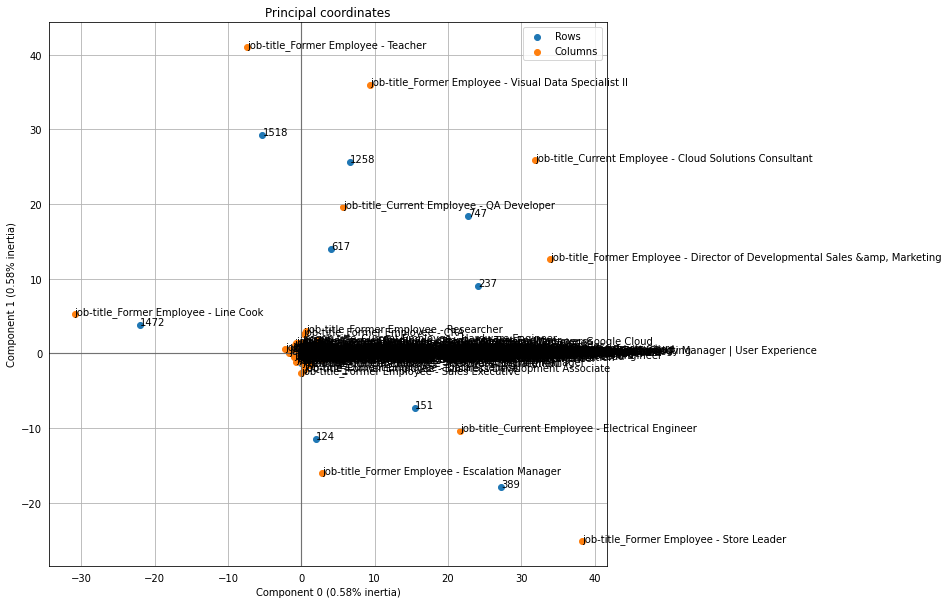

In [ ]:
ax = ca.plot_coordinates(
     X=df,
     ax=None,
     figsize=(10, 10),
     x_component=0,
     y_component=1,
     show_row_labels=True,
     show_col_labels=True
 )
ax.get_figure